In [1]:
!unzip '/content/digit-recognizer.zip'

Archive:  /content/digit-recognizer.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


Approach

1. Load all the libraries and data

2. Data Preparations

3. Data Visualizations

4. Analysis

   a) Sklearn

      - Perceptron

      - Multi-Layer Perceptron

   b) Keras

      - Set the Model (Sequential/Functional): We will use Sequential initially

      - Set up the layers: Dense and Dropout

      - Compile the Model: Optimizer, Batch Function, Loss

      - Fit the Model: (x, y, epochs)

      - Predict the Model (Validation Dataset)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
#### Keras Libraries and Modules ####
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD, Adam
from tensorflow.keras.utils import to_categorical

Load the data

In [ ]:
train_df = pd.read_csv("/content/train.csv")
test_df = pd.read_csv("/content/test.csv")

In [ ]:
train_df.shape

(42000, 785)

In [ ]:
test_df.shape

(28000, 784)

In [ ]:
train_df.skew()

,0
label,0.026479
pixel0,0.000000
pixel1,0.000000
pixel2,0.000000
pixel3,0.000000
...,...
pixel779,145.149671
pixel780,0.000000
pixel781,0.000000
pixel782,0.000000


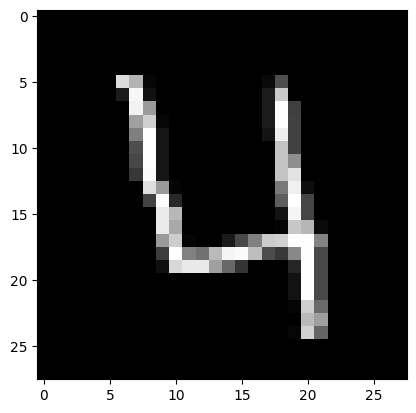

In [ ]:
features = ["pixel{}".format(pixel_num) for pixel_num in range(0,784)]
rows_to_examine = 3
image_data = np.reshape(train_df[features][rows_to_examine:rows_to_examine+1].to_numpy(), (28,28))
plt.imshow(image_data, cmap = 'gray')

In [ ]:
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
x=train_df.iloc[:,1:]
y=train_df['label']

In [ ]:
print(x.shape)
print(y.shape)

(42000, 784)
(42000,)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(33600, 784)
(8400, 784)
(33600,)
(8400,)


**Implement a Single Layer Perceptron**

In [ ]:
per = Perceptron(verbose=1)
per.fit(x_train, y_train)
per_preds_train = per.predict(x_train)
per_preds_test = per.predict(x_test)

-- Epoch 1
Norm: 33680.40, NNZs: 599, Bias: -92.000000, T: 33600, Avg. loss: 46817.951667
Total training time: 0.05 seconds.
-- Epoch 2
Norm: 42819.49, NNZs: 607, Bias: -161.000000, T: 67200, Avg. loss: 41184.869077
Total training time: 0.11 seconds.
-- Epoch 3
Norm: 48607.75, NNZs: 614, Bias: -222.000000, T: 100800, Avg. loss: 36891.702232
Total training time: 0.16 seconds.
-- Epoch 4
Norm: 54442.08, NNZs: 625, Bias: -281.000000, T: 134400, Avg. loss: 35999.461042
Total training time: 0.22 seconds.
-- Epoch 5
Norm: 58608.01, NNZs: 631, Bias: -333.000000, T: 168000, Avg. loss: 37009.589702
Total training time: 0.27 seconds.
-- Epoch 6
Norm: 61946.25, NNZs: 635, Bias: -383.000000, T: 201600, Avg. loss: 34799.316220
Total training time: 0.32 seconds.
-- Epoch 7
Norm: 65207.63, NNZs: 637, Bias: -432.000000, T: 235200, Avg. loss: 36238.479613
Total training time: 0.38 seconds.
-- Epoch 8
Norm: 68995.89, NNZs: 639, Bias: -476.000000, T: 268800, Avg. loss: 34062.205625
Total training time: 0

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    9.7s finished


In [ ]:
print(per.n_iter_)

27


In [ ]:
weights = per.coef_
weights

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
per.intercept_

array([-1061.,  -213., -1456., -1105.,  -876.,   861., -1550.,  -148.,
       -3996., -1616.])

In [ ]:
def model_eval(actual,predicted):
  conf_matrix = confusion_matrix(actual, predicted)
  acc_score = accuracy_score(actual, predicted)
  clas_rpt = classification_report(actual, predicted)
  print(f"Confusion Matrix ::: {conf_matrix}")
  print(f"Accuracy ::: {acc_score}")
  print(f"classification report::: {clas_rpt}")

In [ ]:
model_eval(y_train, per_preds_train)

Confusion Matrix ::: [[3197    0   14    5    2   31   70    1   25    2]
 [   1 3556   20    9    2    5    4    4  130    4]
 [  18    9 2961   70    9   24   34   16  193    5]
 [  19   10   83 3022    1  142   27   16  152   21]
 [   5    8  123   17 2912   19   38   17  103   34]
 [  27    3   16   78   19 2525   96    7  194   30]
 [  13    5   28    3    5   45 3122    0   46    0]
 [   7    6  134   17    7    7    6 3269   40   48]
 [  18   20   38   53    8   92   17   10 2978   12]
 [  19   15  120   63  188  119    8  298  309 2222]]
Accuracy ::: 0.8858333333333334
classification report:::               precision    recall  f1-score   support

           0       0.96      0.96      0.96      3347
           1       0.98      0.95      0.97      3735
           2       0.84      0.89      0.86      3339
           3       0.91      0.87      0.88      3493
           4       0.92      0.89      0.91      3276
           5       0.84      0.84      0.84      2995
           6

In [ ]:
model_eval(y_test, per_preds_test)

Confusion Matrix ::: [[741   1   4   0   0  10  22   0   7   0]
 [  0 895   8   6   1   3   2   0  34   0]
 [  4   3 710  28   2   9  18   4  59   1]
 [  6   2  23 742   2  38   4   5  28   8]
 [  5   6  33   2 689   2  12   6  28  13]
 [ 12   5   4  38   3 654  21   1  58   4]
 [  3   1  12   0   0  18 823   1  12   0]
 [  4   5  32   1   2   6   0 781  15  14]
 [  6  11  15   8   2  25  10   5 732   3]
 [  5   2  37  14  62  30   0  85  82 510]]
Accuracy ::: 0.8663095238095239
classification report:::               precision    recall  f1-score   support

           0       0.94      0.94      0.94       785
           1       0.96      0.94      0.95       949
           2       0.81      0.85      0.83       838
           3       0.88      0.86      0.87       858
           4       0.90      0.87      0.88       796
           5       0.82      0.82      0.82       800
           6       0.90      0.95      0.92       870
           7       0.88      0.91      0.89       860
    

**Multi Layer Perceptron**

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(8,8,8),verbose=True)
mlp.fit(x_train, y_train)

Iteration 1, loss = 2.72753321
Iteration 2, loss = 1.81943915
Iteration 3, loss = 1.68931638
Iteration 4, loss = 1.53823141
Iteration 5, loss = 1.36703928
Iteration 6, loss = 1.25527669
Iteration 7, loss = 1.13897481
Iteration 8, loss = 1.00077678
Iteration 9, loss = 0.90746037
Iteration 10, loss = 0.86818408
Iteration 11, loss = 0.84520977
Iteration 12, loss = 0.82823057
Iteration 13, loss = 0.81880958
Iteration 14, loss = 0.80303862
Iteration 15, loss = 0.79964347
Iteration 16, loss = 0.79291054
Iteration 17, loss = 0.78357796
Iteration 18, loss = 0.77418659
Iteration 19, loss = 0.77660729
Iteration 20, loss = 0.77134811
Iteration 21, loss = 0.76847309
Iteration 22, loss = 0.75826460
Iteration 23, loss = 0.76126470
Iteration 24, loss = 0.76306774
Iteration 25, loss = 0.75446353
Iteration 26, loss = 0.75093706
Iteration 27, loss = 0.75211500
Iteration 28, loss = 0.75171259
Iteration 29, loss = 0.74787547
Iteration 30, loss = 0.74486766
Iteration 31, loss = 0.74332758
Iteration 32, los

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(8, 8, 8), verbose=True)

In [ ]:
preds_mlp_train = mlp.predict(x_train)
preds_mlp_test = mlp.predict(x_test)

In [ ]:
model_eval(y_train, preds_mlp_train)

Confusion Matrix ::: [[3227    0    9    7    9   41   42    5    5    2]
 [   0 3575   32    2    0   19    4   29   70    4]
 [  31    4 2994   88   31   11  111   28   36    5]
 [  61    4  125 2914   10  188    8   29  134   20]
 [  13    2   23    0 3081    6   32   18   17   84]
 [ 223    4   24  113   21 2422   47    2  132    7]
 [  51    0   29    0   20   57 3098    1   11    0]
 [  10    9   32   22   23    5    0 3356    6   78]
 [  28   40   35  206   10  303   25   13 2558   28]
 [  28    4    6   45  218   21    0  167   39 2833]]
Accuracy ::: 0.8945833333333333
classification report:::               precision    recall  f1-score   support

           0       0.88      0.96      0.92      3347
           1       0.98      0.96      0.97      3735
           2       0.90      0.90      0.90      3339
           3       0.86      0.83      0.85      3493
           4       0.90      0.94      0.92      3276
           5       0.79      0.81      0.80      2995
           6

In [ ]:
model_eval(y_test, preds_mlp_test)

Confusion Matrix ::: [[752   0   0   3   2  14  10   3   0   1]
 [  0 890  10   2   0   4   6   8  27   2]
 [ 14   3 723  31  12   8  23  12  10   2]
 [  9   0  39 723   0  43   1  11  20  12]
 [  2   1   5   0 734   2  10   9   8  25]
 [ 62   3   5  49   7 617  15   0  39   3]
 [ 27   2   8   0  11  35 782   0   5   0]
 [  5  10   7   9   9   4   0 785   1  30]
 [  6  20  13  68   4  71  13   7 601  14]
 [ 11   1   0  11  61   6   0  44  10 683]]
Accuracy ::: 0.8678571428571429
classification report:::               precision    recall  f1-score   support

           0       0.85      0.96      0.90       785
           1       0.96      0.94      0.95       949
           2       0.89      0.86      0.88       838
           3       0.81      0.84      0.82       858
           4       0.87      0.92      0.90       796
           5       0.77      0.77      0.77       800
           6       0.91      0.90      0.90       870
           7       0.89      0.91      0.90       860
    

In [ ]:
print(mlp.coefs_)

[array([[ 2.99126364e-315, -4.09027985e-315,  2.03763843e-315, ...,
        -3.43905302e-316,  6.40394007e-317, -4.72141401e-315],
       [ 9.91899600e-316,  5.75146423e-316,  1.94118412e-315, ...,
        -2.63606700e-316, -1.82454630e-315, -7.26710289e-316],
       [ 8.32142238e-316,  3.95762737e-315,  2.16090963e-315, ...,
         2.92704871e-315, -2.04001185e-315,  1.12952216e-315],
       ...,
       [ 1.65242823e-315,  5.59729737e-317, -2.99257199e-315, ...,
        -4.04808010e-315,  4.88779445e-316,  1.04968835e-315],
       [-9.92245169e-316,  4.39190837e-316,  4.53027855e-315, ...,
        -2.12360902e-316, -3.81027235e-316,  2.04406648e-315],
       [ 2.08097080e-315,  2.67801229e-315, -3.75786222e-316, ...,
        -2.98081749e-315, -7.49062970e-316, -7.91407904e-316]]), array([[ 3.00131105e-002,  3.62481214e-001, -4.32557263e-002,
        -2.66372496e-002,  1.19266411e-001, -4.95062402e-003,
         2.52564518e-001, -3.13058780e-002],
       [-6.90907149e-016,  3.3101365

In [ ]:
mlp.intercepts_

[array([-0.55763069,  0.04345268,  1.64865632,  3.19160658, -0.00928063,
         3.68982709, -0.13314769,  4.79031399]),
 array([ 2.61166346, -2.28614811,  0.51989634,  0.12693779, -1.22998419,
         0.44707942,  2.30343485,  3.46267261]),
 array([-0.45355548,  2.11145096,  1.0899732 ,  0.36482901,  2.1951423 ,
         2.99525274,  0.07439672, -1.51592853]),
 array([-0.61964108,  0.87689101,  0.21570137,  0.60594979, -1.07798144,
         1.08137218,  0.93667386,  0.00467287,  1.33925714, -1.81105281])]

**Keras Implementation**

Approach to creating models in Keras:



1.   Initializing a Model
        a. Sequential Model (Sequence of Layers)
        b. Functional Model (Multi Model, Transfer Learning)
2.  Set up the layers
        a. Dense Layers, Fully Connected Layers, MLP
        b. Dropout (Avoid Overfitting)
3.  Compilation
        a. Optimizer (SGD,ADAM)
        b. Loss Function (Regression Loss Function , Classification Loss Function)
        c. Metrics (Accuracy)
4. Model Fit
        a. X and Y (Train and Test)
        b. Epochs (Number of Iterations)
        c. Batch_Size=128,256 - Batch of Images
        

In [ ]:
model = Sequential()
model.add(Dense(128, activation='relu',input_shape=(784,)))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 134,794 (526.54 KB)

 Trainable params: 134,794 (526.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
y_train_ohe = to_categorical(y_train)
y_test_ohe = to_categorical(y_test)

In [ ]:
print(y_train_ohe.shape)
print(y_test_ohe.shape)

(33600, 10)
(8400, 10)


In [ ]:
y_train_ohe

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [ ]:
y_test_ohe

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [ ]:
hist = model.fit(x_train, y_train_ohe, validation_data=(x_test,y_test_ohe) ,epochs=250,batch_size=64,verbose=2)

Epoch 1/250
525/525 - 6s - 12ms/step - accuracy: 0.2955 - loss: 4.7624 - val_accuracy: 0.5125 - val_loss: 1.3812
Epoch 2/250
525/525 - 3s - 6ms/step - accuracy: 0.4546 - loss: 1.5400 - val_accuracy: 0.5926 - val_loss: 1.1535
Epoch 3/250
525/525 - 3s - 6ms/step - accuracy: 0.5001 - loss: 1.3831 - val_accuracy: 0.6125 - val_loss: 1.0415
Epoch 4/250
525/525 - 3s - 6ms/step - accuracy: 0.5283 - loss: 1.2720 - val_accuracy: 0.6415 - val_loss: 0.9584
Epoch 5/250
525/525 - 4s - 8ms/step - accuracy: 0.6003 - loss: 1.1148 - val_accuracy: 0.7220 - val_loss: 0.7647
Epoch 6/250
525/525 - 3s - 6ms/step - accuracy: 0.6260 - loss: 1.0301 - val_accuracy: 0.7579 - val_loss: 0.7167
Epoch 7/250
525/525 - 3s - 5ms/step - accuracy: 0.6754 - loss: 0.9506 - val_accuracy: 0.8204 - val_loss: 0.6290
Epoch 8/250
525/525 - 3s - 6ms/step - accuracy: 0.7393 - loss: 0.8315 - val_accuracy: 0.8832 - val_loss: 0.4828
Epoch 9/250
525/525 - 4s - 8ms/step - accuracy: 0.7767 - loss: 0.7391 - val_accuracy: 0.8932 - val_loss

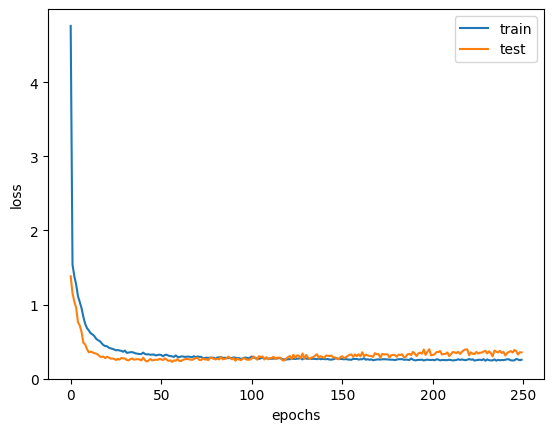

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train','test'])
plt.show()

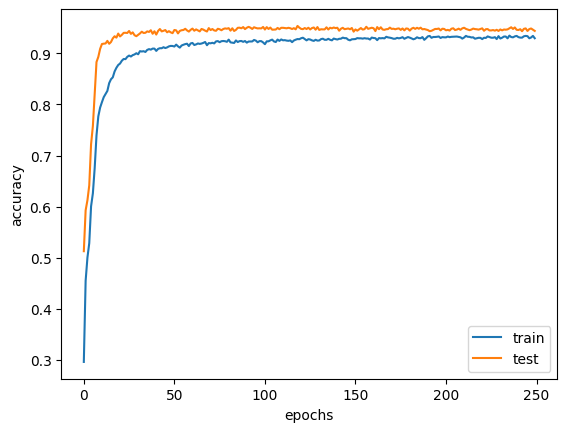

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','test'])
plt.show()